In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv", delimiter=',')
data.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [3]:
uniqueVals = data.nunique(axis=0)
uniqueVals

Year           4
Major         20
University    10
Time          10
Order         10
dtype: int64

In [4]:
input_cols = ["Year", "Major", "University", "Time"]
output_col = "Order"

Year
Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: count, dtype: int64
Major
Chemistry                  640
Biology                    635
Astronomy                  619
Physics                    610
Mathematics                582
Economics                  511
Business Administration    334
Political Science          309
Marketing                  239
Anthropology               146
Finance                    135
Psychology                  76
Accounting                  62
Sociology                   31
International Business      29
Music                       21
Mechanical Engineering      11
Philosophy                   4
Fine Arts                    3
Civil Engineering            3
Name: count, dtype: int64
University
Butler University                                            1614
Indiana State University                                     1309
Ball State University                                        1085
Indiana University-Purdue University Indianapoli

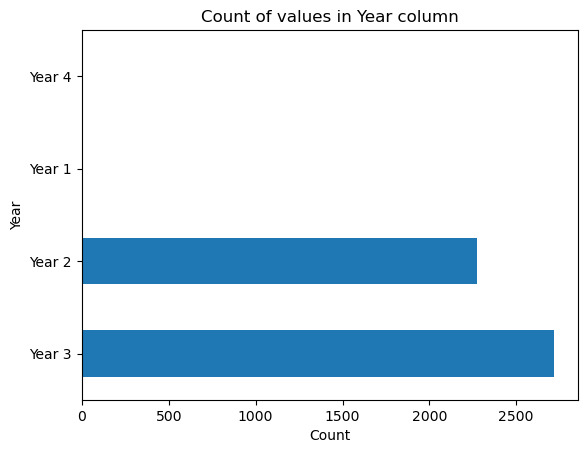

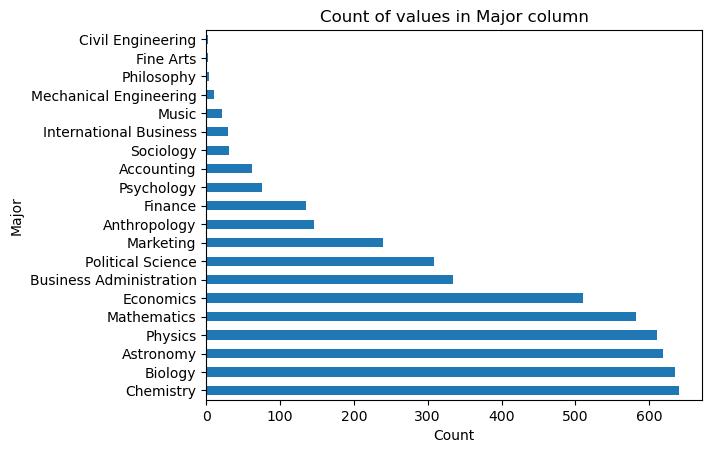

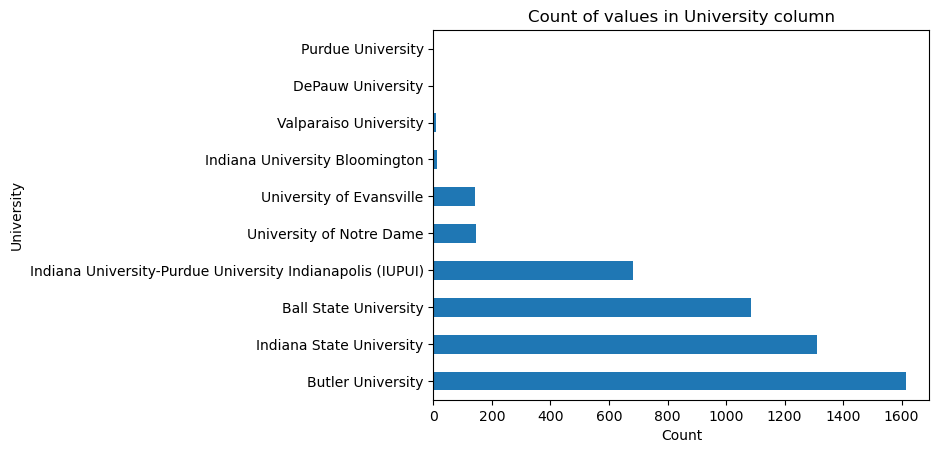

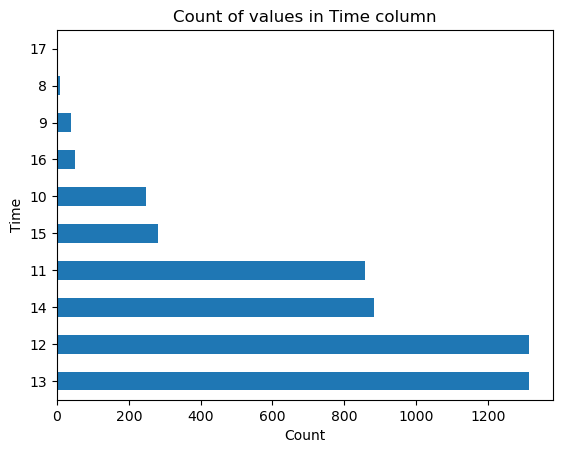

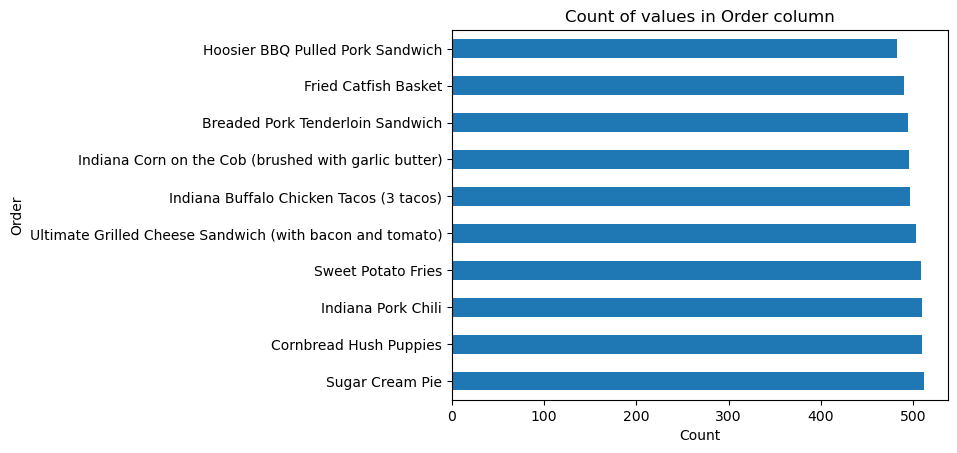

In [5]:
# Visualize different aspects of the data

# See distribution of different values
for i in ['Year', 'Major', 'University', 'Time', 'Order']:
    print(data.value_counts(i))
    plt.figure()
    plt.title(f"Count of values in {i} column")
    data.value_counts(i).plot(kind='barh')
    plt.xlabel("Count")
    plt.savefig(f'images/graphs/column_counts/{i}_counts.png', bbox_inches='tight')
plt.show()

In [32]:
import os
# make temporal graphs of the counts of different column values for a given university
def plot_university_trends(university, data, show):
    uni_data = data[data["University"] == university]
    for col in ["Year", "Major", "Order"]:
        plt.figure()
        ax = plt.subplot()
        plt.title(f"Counts of {col} values throughout the day for {university}")
        for val in uni_data[col].unique():
            sub = uni_data[uni_data[col] == val]
            ax.plot(sub["Time"].value_counts().sort_index())
        plt.xlabel("Time")
        plt.ylabel(f"Count")
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        ax.legend(uni_data[col].unique(), loc='center left', bbox_to_anchor=(1, 0.5))
        
        results_dir = f'images/graphs/trends/{university} trends/'
        if not os.path.isdir(results_dir):
            os.makedirs(results_dir)
        
        plt.savefig(results_dir + f'{col}_trends.png', bbox_inches='tight')
        if show:
            plt.show()

# for university in data["University"].unique():
#     plot_university_trends(university, data, False)

In [7]:
# Load data, encode categorical values to numerical values, return split of data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
les = []
def prepare_data(file, in_cols, out_cols):
    data = pd.read_csv(file, delimiter=',')
    X = data[in_cols].values
    y = data[out_cols].values
    global les
    if len(les) != 0:
        les = []
    for col in range(len(X[0]) - 1):
        le = LabelEncoder()
        le.fit(X[:,col])
        les.append(le)
        X[:,col] = le.transform(X[:,col])
    le = LabelEncoder()
    le.fit(y)
    les.append(y)
    y = le.transform(y)
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
import pickle

def train_and_save_model(X_train, X_test, y_train, y_test, filename):
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    print("Train Score: ", rf.score(X_train, y_train))
    print("Test Score: ", rf.score(X_test, y_test))
    pickle.dump(rf, open(filename, 'wb'))

In [9]:
data_file = "XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv"
X_train, X_test, y_train, y_test = prepare_data(data_file, input_cols, output_col)
len(X_train), len(y_train), len(X_test), len(y_test)

(4000, 4000, 1000, 1000)

In [10]:
model_file = "model.pkl"
train_and_save_model(X_train, X_test, y_train, y_test, model_file)
model = pickle.load(open(model_file, 'rb'))
X_test[0], y_test[0], model.predict(X_test[0].reshape(1, -1))

Train Score:  0.734
Test Score:  0.651


(array([1, 12, 0, 14], dtype=object), 9, array([9]))

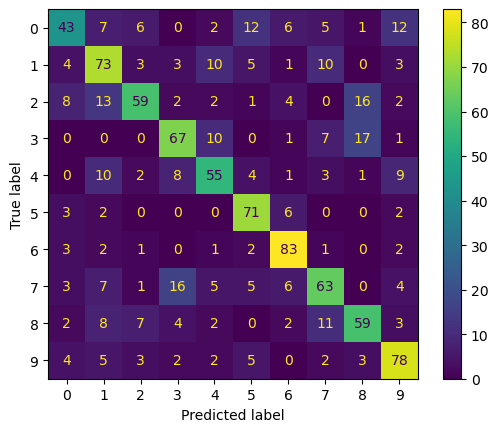

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.savefig("images/Confusion_Matrix.png")
plt.show()

# Hyperparameter Tuning

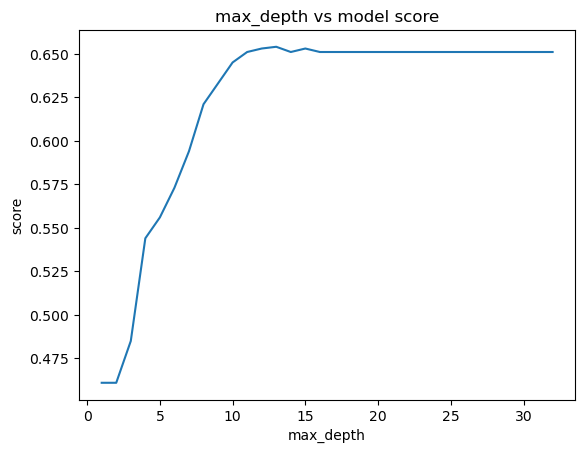

In [38]:
max_depths = [x for x in range(1, 33)]
depth_scores = []

for depth in max_depths:
    rf = RandomForestClassifier(random_state=42, max_depth=depth)
    rf.fit(X_train, y_train)
    depth_scores.append(rf.score(X_test, y_test))
plt.plot(max_depths, depth_scores)
plt.xlabel("max_depth")
plt.ylabel("score")
plt.title("max_depth vs model score")
#plt.savefig("images/graphs/hyperparameters/max_depth.png")

In [39]:
for val in range(len(max_depths)):
    print(max_depths[val], depth_scores[val])
best_max_depth = max_depths[pd.Series(depth_scores).idxmax()]
best_max_depth

1 0.461
2 0.461
3 0.485
4 0.544
5 0.556
6 0.573
7 0.594
8 0.621
9 0.633
10 0.645
11 0.651
12 0.653
13 0.654
14 0.651
15 0.653
16 0.651
17 0.651
18 0.651
19 0.651
20 0.651
21 0.651
22 0.651
23 0.651
24 0.651
25 0.651
26 0.651
27 0.651
28 0.651
29 0.651
30 0.651
31 0.651
32 0.651


13

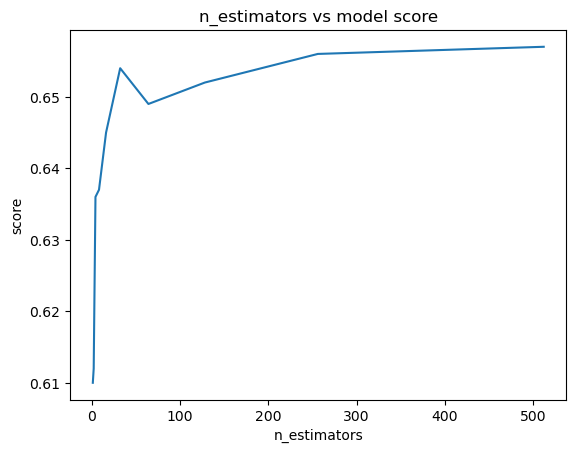

In [37]:
n_estimators = [2**x for x in range(10)]
scores = []

for estimators in n_estimators:
    rf = RandomForestClassifier(random_state=42, n_estimators=estimators)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.title("n_estimators vs model score")
#plt.savefig("images/graphs/hyperparameters/n_estimators.png")

In [40]:
#At n_estimators = 32, there's marginal improvements onwards
for val in range(len(n_estimators)):
    print(n_estimators[val], scores[val])
best_n_estimators = 32

1 0.61
2 0.612
4 0.636
8 0.637
16 0.645
32 0.654
64 0.649
128 0.652
256 0.656
512 0.657


In [41]:
rf = RandomForestClassifier(random_state=42, max_depth=best_max_depth, n_estimators=best_n_estimators)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.654

In [42]:
# Calculate feature importance
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

import time

start_time = time.time()
importances = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.981 seconds


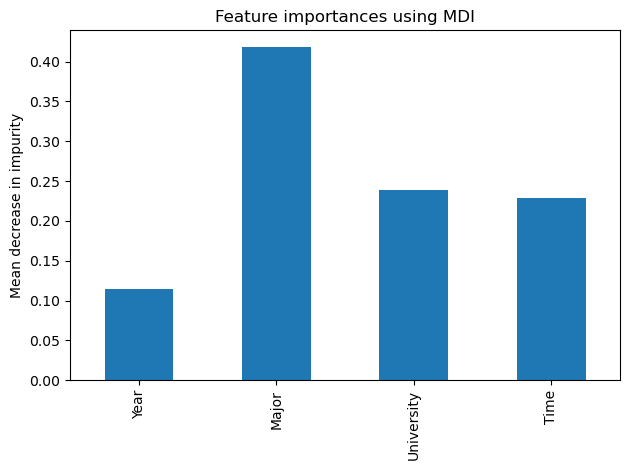

In [44]:
forest_importances = pd.Series(importances, index=data.columns.drop("Order"))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
#plt.savefig("images/graphs/feature_importances.png")